# Locally Weighted Regression

Non-parametric algorithm  
  
1) Read and normalise the dataset.  
2) Generate W // Different for all testing points  
3) No training is involved, directly make predictions using (X'WX)<sup>-1</sup>*X'WY  
4) Find the best value of Tau(Bandwidth parameter) [Cross Validation] // Hyper-parameter

## Read and normalise dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [3]:
X = dfx.values

In [4]:
Y = dfy.values

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [6]:
X = (X - X.mean()) / X.std()

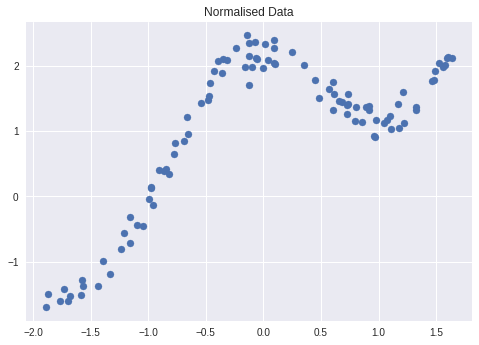

In [8]:
plt.style.use('seaborn')
plt.title('Normalised Data')
plt.scatter(X, Y)
plt.show()

## Generate W (diagonal matrix of dimension m x m) for all test points

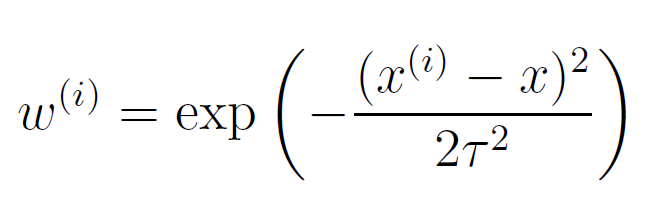

In [12]:
# print(type(np.eye(5)))

<class 'numpy.ndarray'>


In [13]:
# type(np.array([1, 2, 3]))

numpy.ndarray

In [15]:
# type(np.array([[1, 2, 3], [2, 3, 1], [3, 1, 2]]))

numpy.ndarray

In [16]:
# print(type(np.mat(np.eye)))

<class 'numpy.matrix'>


a * b --> a, b are matrices --> Matrix Multiplication  
a * b --> a, b are arrays   --> Element-wise Multiplication

In [21]:
X = np.matrix(X)
Y = np.matrix(Y)
M = X.shape[0]

In [20]:
def getW(query_point, X, tau) :
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M) :
        num = np.dot((X[i] - query_point), (X[i] - query_point).T)
        W[i, i] =  np.exp(- num / (2 * tau**2))
    
    return W

In [26]:
W = getW(-1, X, 1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [27]:
W = getW(-1, X, 100) # Close to identity matrix
# If W is identity matrix, then it becomes linear regression
# tau is proportional to size of region influencing the regression
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [28]:
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


## Making Predictions

In [41]:
def predict(X, Y, query_x, tau) :
    # (X'WX)-1*X'WY
    ones = np.ones((M, 1))
    X_ = np.hstack((X, ones))
    qx = np.mat([query_x, 1])
    W = getW(qx, X_, tau)
    A = X_.T * W * X_
    B = X_.T * W * Y
    theta = np.linalg.pinv(A) * B
    pred = np.dot(qx, theta)
    return theta, pred

In [42]:
theta, pred = predict(X, Y, 1.0, 1.0)
print(theta)
print(pred)
print(theta.shape, pred.shape)
print(type(theta), type(pred))

[[0.14069504]
 [1.45348191]]
[[1.59417694]]
(2, 1) (1, 1)
<class 'numpy.matrix'> <class 'numpy.matrix'>


In [59]:
def plotPrediction(tau) :
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    
    for xq in X_test :
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred)
    
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title('Tau/Bandwidth = ' + str(tau))
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color = 'red')
    plt.show()

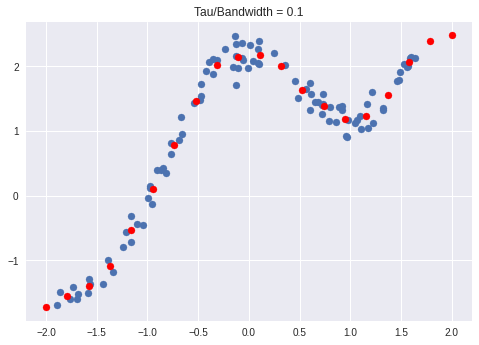

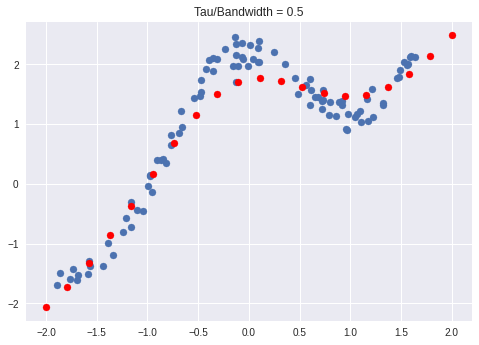

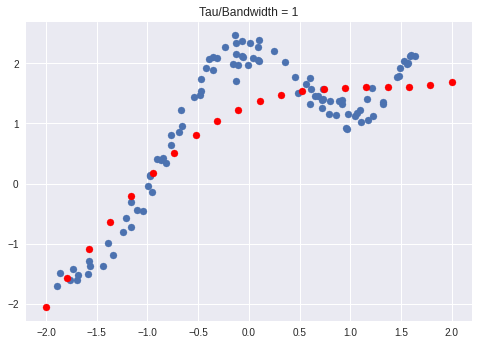

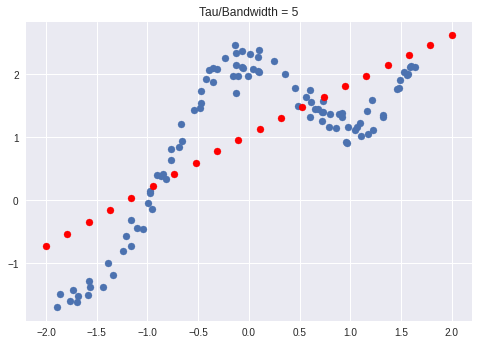

In [60]:
tau = [0.1, 0.5, 1, 5]

for i in range(4) :
    plotPrediction(tau[i])